In [1]:
cd ..

C:\Users\johan\github\designresolver


In [2]:
from collections import OrderedDict
from graphutils import draw_graph_graphical_props, flat_graph_formulation, Node, COMP, VAR, SOLVER, sources, all_varnodes
from nestedgraph import build_typedgraph, level_order_tree, typed_solver_children
from mergegraph import merge_graph, split_graph, get_edges
from operators import standardize_comp, standardize_solver, merge_and_standardize, reorder_merge_solve

# Reduce a component

In [3]:
Ein = {
    1: (2,),
    2: (1,),
}
Eout = {
    1: (1,),
    2: (2,)
}
Rin = {
}
Vtree=dict()
Ftree=OrderedDict(((1,1),(2,1)))

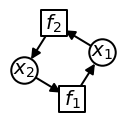

In [4]:
G = flat_graph_formulation(Ein, Eout, Rin)
draw_graph_graphical_props(G, {}, prog='sfdp', figsize=(2,2))

In [5]:
edges = (Ein, Eout, Rin)
tree = (Vtree, Ftree)
edges, Vtree = standardize_comp(edges, Vtree, Ftree, 1)
edges, Vtree = standardize_comp(edges, Vtree, Ftree, 2)

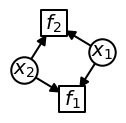

In [6]:
G_reduced = flat_graph_formulation(*edges)
draw_graph_graphical_props(G_reduced, {}, prog='sfdp', figsize=(2,2))

# Reduce a solver

In [7]:
Ein = {
    1: (1,2),
    2: (2,1,3),
    3: (2,),
}
Eout = {
    1: (None,),
    2: (None,),
    3: (3,)
}
Rin = {
}
Vtree=dict()
Ftree=OrderedDict(((1,2),(2,2),(3,1)))
Stree={2:1}

In [8]:
graphs = build_typedgraph((Ein, Eout, Rin), (Ftree, Stree, Vtree))

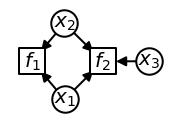

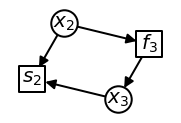

In [9]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(3,2))

In [10]:
Ftree_r, Stree_r = standardize_solver((Ftree, Stree), 2)

In [11]:
graphs = build_typedgraph((Ein, Eout, Rin), (Ftree_r, Stree_r, Vtree))

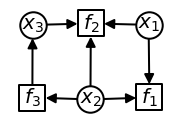

In [12]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(3,2))

# Merge and reduce

In [26]:
Ein = {
    1: (2,),
    2: (1,),
    3: (2,),
}
Eout = {
    1: (1,),
    2: (2,),
    3: (3,)
}
Rin = {
}
Vtree={} #3:1
Ftree=OrderedDict(((1,1),(2,1),(3,1)))
Stree=dict()

In [27]:
edges = Ein, Eout, Rin
tree = Ftree,Stree,Vtree

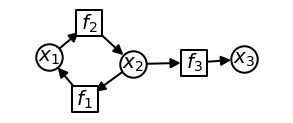

In [28]:
graphs = build_typedgraph(edges, tree)
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(5,2))

In [29]:
nedges, ntree = merge_and_standardize(edges, tree, {Node(1,COMP),Node(2,COMP)}, 1, 2, False)

In [30]:
nedges, ntree

(({1: (2,), 2: (1,), 3: (2,)},
  {1: (None,), 2: (None,), 3: (3,)},
  {2: (2,), 1: (1,)}),
 (OrderedDict([(1, 1), (2, 1), (3, 1)]), {}, {2: 1, 1: 1}))

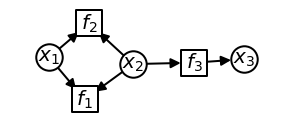

In [32]:
graphs = build_typedgraph(nedges, ntree)
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(5,2))

# Merge and reorder

In [33]:
merge_order = [{Node(1,COMP),Node(2,COMP)}, {Node(3,COMP)}]

In [38]:
nedges, ntree = reorder_merge_solve(edges, tree, merge_order, 1, False)

In [39]:
ntree

(OrderedDict([(2, 1), (1, 1), (3, 1)]), {}, {2: 1, 1: 1})

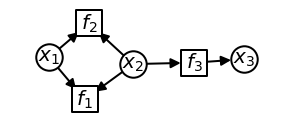

In [40]:
graphs = build_typedgraph(nedges, ntree)
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(5,2))